# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 
from sklearn.cluster import KMeans
import warnings
warnings.simplefilter(action='ignore')

# Data Load & Analysis

In [2]:
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.isnull().sum() #checking missing values 

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data Visualization

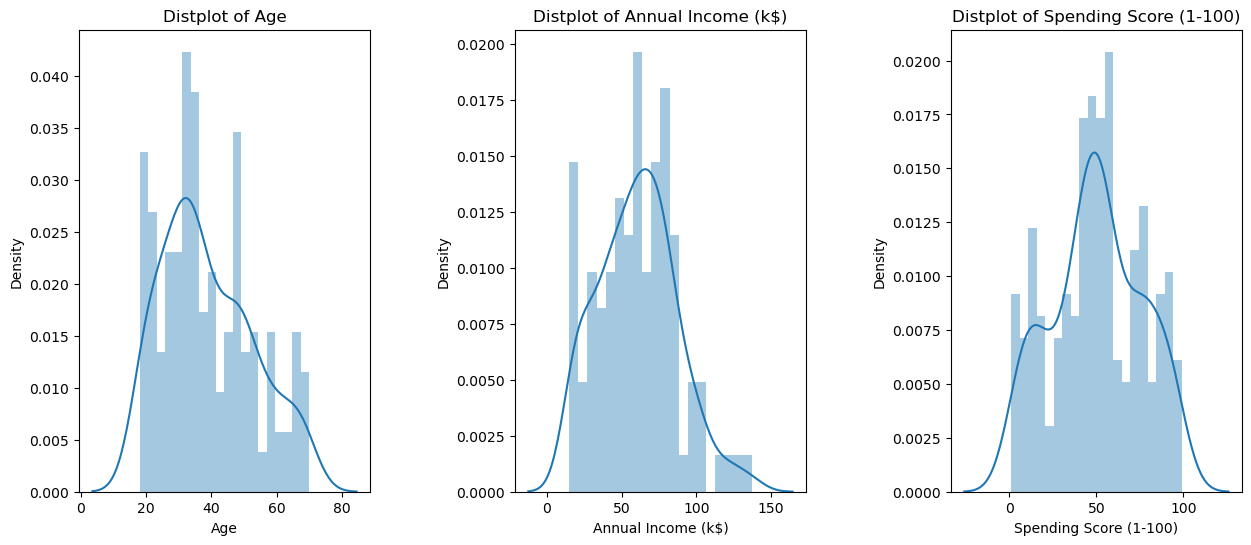

In [7]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sn.distplot(df[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

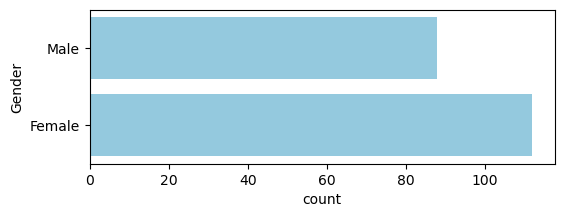

In [8]:
plt.figure(figsize=(6,2))
sn.countplot(y="Gender",data=df,color='skyblue')
plt.show()

In [9]:
age_18_25=df.Age[(df.Age>=18 )& (df.Age<=25 )]
age_26_35=df.Age[(df.Age>=26) & (df.Age<=35)]
age_36_45=df.Age[(df.Age>=36) & (df.Age<=45)]
age_45_55=df.Age[(df.Age>=46) & (df.Age<=55)]
age_55_above =df.Age[(df.Age>=55)]

In [10]:
agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_45_55.values),len(age_55_above.values)]

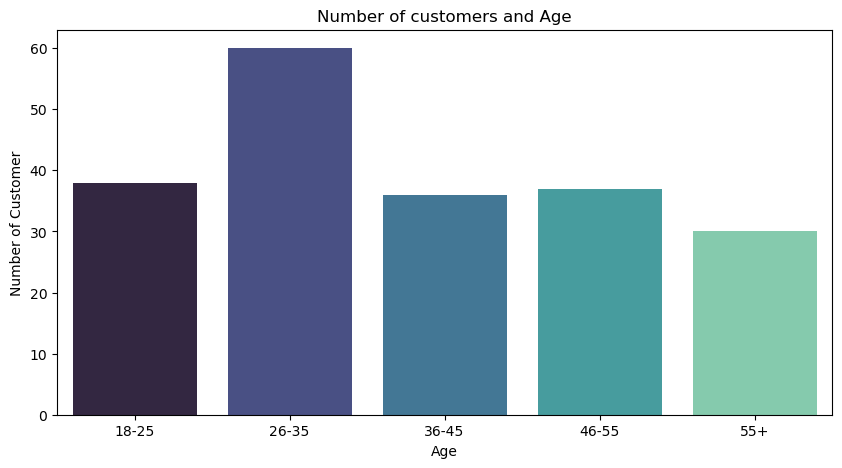

In [11]:
plt.figure(figsize=(10,5))
sn.barplot(x=agex,y=agey,palette="mako")
plt.title('Number of customers and Age')
plt.xlabel('Age')
plt.ylabel('Number of Customer')
plt.show()

<Figure size 1000x400 with 0 Axes>

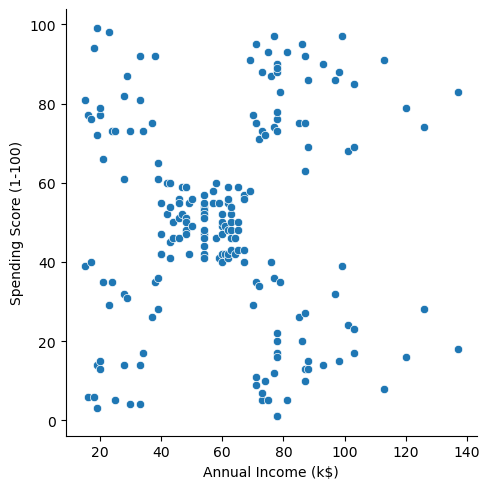

In [12]:
plt.figure(figsize=(10,4))
sn.relplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)
plt.show()


In [13]:
df.rename(columns={'Spending Score (1-100)':'spending_score_1to100'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),spending_score_1to100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
ss_1_25=df.spending_score_1to100[(df.spending_score_1to100>=1 )& (df.spending_score_1to100<=25 )]
ss_26_50=df.spending_score_1to100[(df.spending_score_1to100>=26) & (df.spending_score_1to100<=50)]
ss_51_75=df.spending_score_1to100[(df.spending_score_1to100>=51) & (df.spending_score_1to100<=75)]
ss_75_above =df.spending_score_1to100[(df.spending_score_1to100>=75)]

In [15]:
ssx=['1_25','26_50','51_75','75+']
l=[ss_1_25,ss_26_50,ss_51_75,ss_75_above]
ssy=[]
for i in l:
    ssy.append(len(i.values))

    

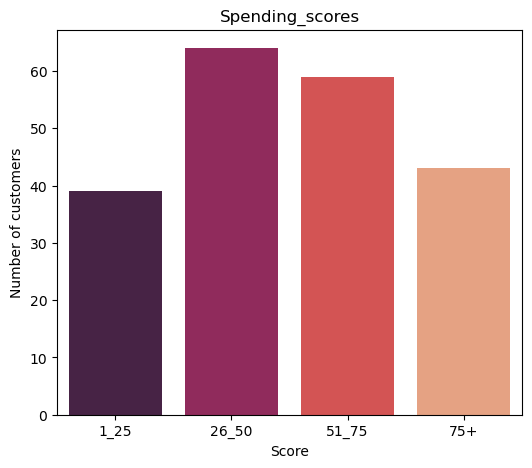

In [16]:
plt.figure(figsize=(6,5))
sn.barplot(x=ssx,y=ssy,palette='rocket')
plt.title('Spending_scores')
plt.xlabel('Score')
plt.ylabel('Number of customers')
plt.show()

In [17]:
x=df.iloc[:,[3,4]].values
x.astype('float64')

array([[ 15.,  39.],
       [ 15.,  81.],
       [ 16.,   6.],
       [ 16.,  77.],
       [ 17.,  40.],
       [ 17.,  76.],
       [ 18.,   6.],
       [ 18.,  94.],
       [ 19.,   3.],
       [ 19.,  72.],
       [ 19.,  14.],
       [ 19.,  99.],
       [ 20.,  15.],
       [ 20.,  77.],
       [ 20.,  13.],
       [ 20.,  79.],
       [ 21.,  35.],
       [ 21.,  66.],
       [ 23.,  29.],
       [ 23.,  98.],
       [ 24.,  35.],
       [ 24.,  73.],
       [ 25.,   5.],
       [ 25.,  73.],
       [ 28.,  14.],
       [ 28.,  82.],
       [ 28.,  32.],
       [ 28.,  61.],
       [ 29.,  31.],
       [ 29.,  87.],
       [ 30.,   4.],
       [ 30.,  73.],
       [ 33.,   4.],
       [ 33.,  92.],
       [ 33.,  14.],
       [ 33.,  81.],
       [ 34.,  17.],
       [ 34.,  73.],
       [ 37.,  26.],
       [ 37.,  75.],
       [ 38.,  35.],
       [ 38.,  92.],
       [ 39.,  36.],
       [ 39.,  61.],
       [ 39.,  28.],
       [ 39.,  65.],
       [ 40.,  55.],
       [ 40.,

# Model Building in Kmeans 

In [18]:
# choosing the no of clusters 

* finding wcss value for different no.of.clusters

In [22]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    
    
    

Text(0, 0.5, 'WCSS')

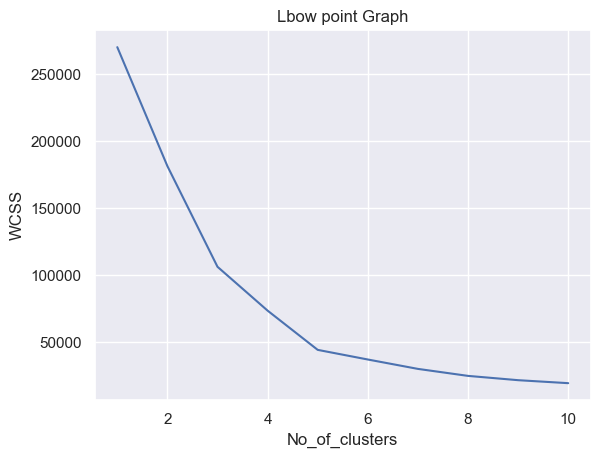

In [25]:
sn.set()
plt.plot(range(1,11),wcss)
plt.title('Lbow point Graph')
plt.xlabel('No_of_clusters')
plt.ylabel('WCSS')


In [26]:
# here we can see error gets reduced when k=5

In [28]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)
y=kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


# Plot the clustters

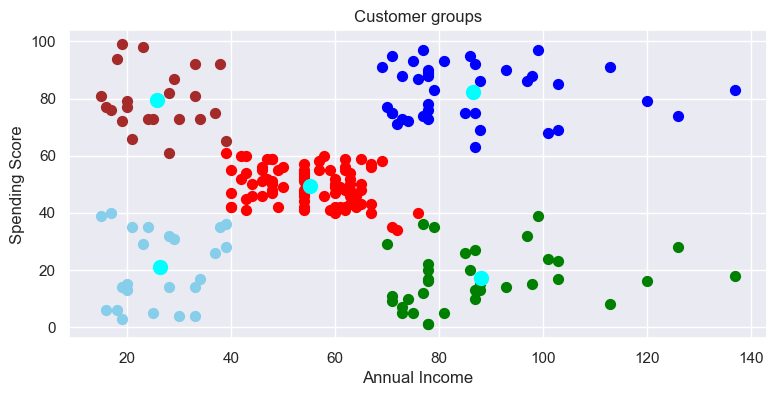

In [32]:
plt.figure(figsize=(9,4))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='blue',label='Cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='brown',label='Cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='skyblue',label='Cluster5')

# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

